In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score

,Entity,Code,Year,Life Expectancy
16777,United States,USA,1880,39.410000
16778,United States,USA,1890,45.209999
16779,United States,USA,1901,49.299999
16780,United States,USA,1902,50.500000
16781,United States,USA,1903,50.599998


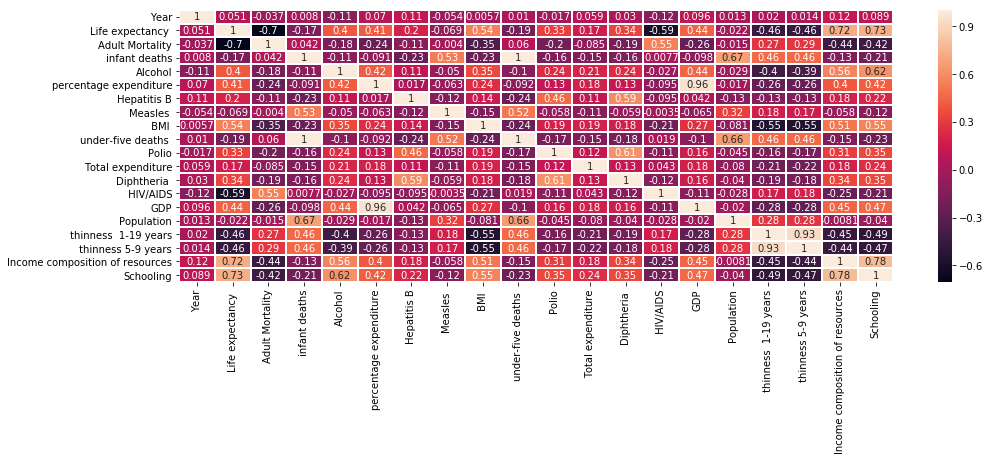

In [86]:
full_data = pd.read_csv('Life Expectancy Data 1.csv')
partial_data = pd.read_csv('Life Expectancy Data 2.csv')
full_data_clean = full_data.dropna(how='any')
full_data_clean.count()
plt.figure(figsize = (16,5))

sns.heatmap(full_data_clean.corr(),annot=True,linewidths=1.0)
partial_data.rename(columns={'Life expectancy (Clio-Infra up to 1949; UN Population Division for 1950 to 2015)':'Life Expectancy'},inplace=True)
partial_data_usa = partial_data.loc[partial_data['Code'] == 'USA']
partial_data_usa.head()

C:\Users\santo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Users\santo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


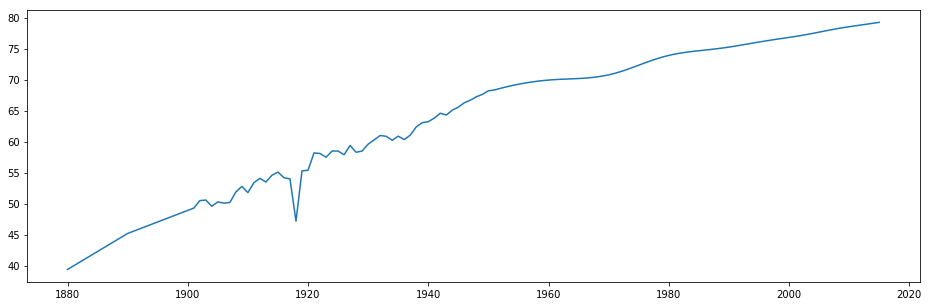

In [102]:
# Assign the data to X and y
X = partial_data_usa['Year'].reshape(-1, 1)
y = partial_data_usa['Life Expectancy'].reshape(-1, 1)
# print("Shape: ", X.shape, y.shape)
plt.figure(figsize = (16,5))
plt.plot(X, y)

In [93]:
# Create training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25)

In [94]:
# Create model
model = LinearRegression()


In [95]:
# Fit the model with training data
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [110]:
# Create predicted model 
predicted = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
# Calculate MSE and R2 value
mse = mean_squared_error(y_test, predicted)
R2 = r2_score(y_test,predicted)
R2

0.9564712402020918

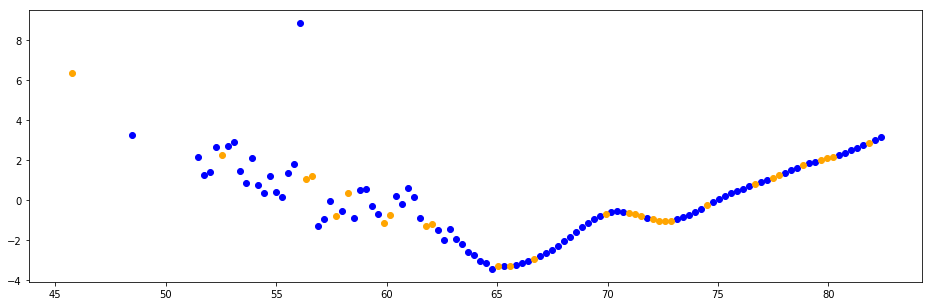

In [99]:
plt.figure(figsize = (16,5))
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
# plt.legend()

